## Baseline checks

Just checking everything works as it should

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [ ]:
results_path = f"../results/**/"

In [ ]:



cns = [0, 1]
df = pd.DataFrame()
for cn in cns:
    results_path = f"../bin/federated_outputs/results_{cn}.json"
    # path to the results file
    with open(results_path, "r") as f:
        data = json.load(f)
    for entry in data["client_train"]:
            round_num = entry["round"]
            for itr, loss_val in enumerate(entry["nodesolve"]):
                df = pd.concat([df, pd.DataFrame([{
                    "client": cn,
                    "round": round_num,
                    "itr": itr,
                    "nodesolve": loss_val
                }])], ignore_index=True)
    
    # results_df = pd.DataFrame(data["client_train"])
    # loss_df = pd.DataFrame(results_df["loss"].tolist(), columns=["loss_0", "loss_1"])
    # results_df = pd.concat([results_df.drop(columns=["loss"]), loss_df], axis=1)
    # results_df["client"] = cn
    # df = pd.concat([df, results_df], ignore_index=True)
# mix itr and round
# add 1 to round and multiply itr by round
df["itr"] = df["itr"] + 1
max_itr = df["itr"].max()
df["itr"] = df["itr"] + (max_itr* df["round"])
# keep only itr 1:3
df

,client,round,itr,nodesolve
0,0,0,1,20
1,0,0,2,116
2,0,0,3,98
3,0,0,4,140
4,0,0,5,206
...,...,...,...,...
121,1,3,52,230
122,1,3,53,260
123,1,3,54,344
124,1,3,55,278


In [91]:
df

,client,round,itr,nodesolve
0,0,0,1,20
1,0,0,2,116
2,0,0,3,98
3,0,0,4,140
4,0,0,5,206
...,...,...,...,...
121,1,3,52,230
122,1,3,53,260
123,1,3,54,344
124,1,3,55,278


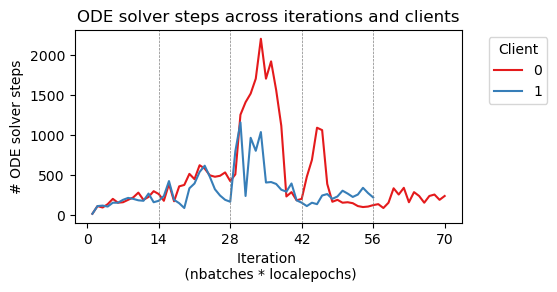

In [92]:
# Plot Loss for making sure, y loss, x round, color client
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df, x="itr", y="nodesolve", hue="client", palette="Set1")

plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("ODE solver steps across iterations and clients")
# plot rounds as vertical lines
for i in range(1, df["round"].max()+1):
    plt.axvline(x=i*max_itr, color='gray', linestyle='--', linewidth=0.5)
    # add ticks
    plt.xticks(np.arange(0, df["itr"].max()+1, step=max_itr))


# y label 
plt.ylabel("# ODE solver steps")
# x label
plt.xlabel("Iteration \n (nbatches * localepochs)")
plt.show()